## Часть 1.

### Задача 1

1) *Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?*

Берём наше множество объектов, запускаем на нём какой-либо из алгоритмов кластеризации. Если алгоритм каждый раз сходится к разным ответам, это означает, что какая-либо кластерная структура у наших объектов отсутствует. При этом под "сходится к разным ответам" подразумевается, что разметка на кластеры не совпадает по количеству или объекты, которые при одном исходе были в одном кластере, при другом исходе могут оказаться в разных.

2) *Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой?*

Для выделения кластеров с чисто ленточной структурой можно использовать алгоритм выделения связных компонент в графе, DBSCAN, Иерархическая кластеризация.

3) *Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?*

Алгоритм выделения связных компонент, КНП.

4) *Каким образом приближают «центр кластера» в нелинейных пространствах?*

Выбирается объект, для которого среднее растояние до других элементов кластера минимально.

5) *Каким образом можно определять число кластеров?*

Можно посмотреть на дендрограмму, построенную в ходе иерархической кластеризации, и исходя из представлений о расстоянии между кластерами, выбрать наиболее подходящий уровень на дендраграмме. По нему будет видно, сколько кластеров образовалось.

Так же есть ЕМ-алгоритм с последовательным добавлением компонент. При построении компонент он оценивает, какие элементы хуже всего описываются таким разбиением — это объекты с наименьшими значениями правдоподобия $p(x_i)$.

### Задача 2 
*Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.*

I шаг алгоритма:

Первый Е-шаг даст следующее разбиение: 

1 кластер: 1, 5

2 кластер: 7, 8, 8

После М-шага получим новые центры кластеров:

1 кластер: 3

2 кластер: 7,67

Так после II шага распределение по кластерам не изменится, то центры кластеров останутся прежними.


### Задача 3 

*Докажите, что the k-means всегда сходится.*

Введём понятие инерции $\frac{1}{n} \sum \limits_{j=1}^K \sum \limits_{i = 1}^n |x_i - c_j|^2$

#### Теорема 
*K-Means монотонно уменьшает инерцию.*

Покажем это: пусть $\Psi(X^{(t)}) = \frac{1}{n}\sum \limits_{j=1}^K \sum \limits_{i = 1}^n |x_i - c_j|^2$, где $X^{(t)}$ - текущее разбиение на кластеры, а $X_1^{(t)}, \ldots, X_K^{(t)}$ - текущие кластеры с центрами кластеров - $c_1^{(t)}, \ldots , c_K^{(t)}$ и функцией принадлежности кластеру $A^{(t)}$.


$\psi(X^{(t)} \geqslant \sum \limits_{j=1}^K \sum \limits_{x_i \in X_j^{(t)}} \mid\mid x_i - c_{A_{(x_i)}^{(t+1)}}^{(t)}\mid\mid^2 \geqslant  \sum \limits_{j=1}^K \sum \limits_{x_i \in X_j^{(t)}} \mid\mid x_i - c_{j}^{(t+1)}\mid\mid^2 \geqslant \psi(X^{(t+1)})$

Такимм образом мы можем сделать вывод, что алгоритм KMeans сходится за конечное число шагов.

Так как мы не можем предоставить бесконечную последовательность разбиений, так чтобы инерция уменьшалась. (Максимальное число разбиений фиксировано и равно $C_n^k$) Так как если только конечная такая последовательность, то найдётся такое $t: \psi(X^{(t)} = \psi^{(t+1)})$. Отсюда получаем, что $X^(t+1) = X^{(t)}$. В противном случае некоторые точки были классифицированы неправильно, и функции не могли быть равны, или точки не имеют кластерной структуры.

### Задача 4


# Практическое задание 1

При реализации воспользуемся тем, что эффективная размерность выборки $m$ находится следующим образом:
Это наименьшее целое число $m$, что выполняется
$\frac{\lambda_{m+1} + \ldots + \lambda_{n}}{\lambda_1 + \ldots + \lambda_n} < \varepsilon$. 

В нашем случае эта формула приобретает вид $\frac{\lambda_{1} + \ldots + \lambda_{m}}{\lambda_1 + \ldots + \lambda_n} \geqslant varRetained$

In [22]:
import numpy as np
import pylab as plt
%matplotlib inline
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F.dot(np.transpose(F))
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = np.linalg.svd(Sigma, full_matrices=True)
    
    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    
    m = 0
    while (var_i[m] <= varRetained * 100):
        m+=1

    print ('%.2f %% variance retained in %d dimensions' %(var_i[m], m))
    #верните число m и точность, которая достигается при этом числе главных компонент

    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.plot(np.ones(len(var_i)) * varRetained * 100)
        plt.xlabel('Number of Features')
        plt.ylabel('Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = U[:,:m + 1]#только m главных компонент
    G = U_reduced.dot(np.diag(d[:m + 1])) #вычислить матрицу в преобразованном пространстве
    return G, U_reduced

In [23]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal COmponent Analysis
95.25 % variance retained in 15 dimensions


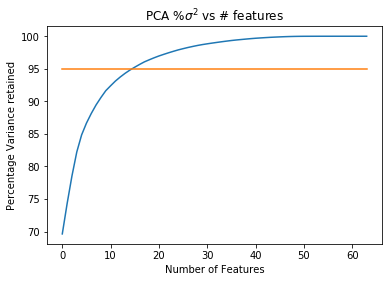

In [24]:
#################################################################
# PCA of training set
print ('Performing PCA - Principal COmponent Analysis')

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)

# Практическое задание 2

In [17]:
from sklearn.datasets import load_digits
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

In [2]:
X = StandardScaler().fit_transform(X)
X.shape

(1797, 64)

Прогоним параметры по сетке.

In [6]:
%%time
for eps in np.linspace(3.5, 5., 100):
    for min_samples in np.arange(0, 50):
        db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters_ > 8 and n_clusters_ < 14:
            print('Adjusted Rand-Index:', adjusted_rand_score(y, labels))
            print('Adjusted Mutual Information:', adjusted_mutual_info_score(y, labels))
            print(eps, min_samples)
            print("Number of clusters", n_clusters_)

Adjusted Rand-Index: 0.0497067698187
Adjusted Mutual Information: 0.232415321424
3.5 7
Number of clusters 13
Adjusted Rand-Index: 0.0563056231594
Adjusted Mutual Information: 0.248311553598
3.5303030303 7
Number of clusters 13
Adjusted Rand-Index: 0.0651387170208
Adjusted Mutual Information: 0.272820515637
3.57575757576 7
Number of clusters 13
Adjusted Rand-Index: 0.0545837302509
Adjusted Mutual Information: 0.231420220558
3.57575757576 8
Number of clusters 9
Adjusted Rand-Index: 0.0550867182065
Adjusted Mutual Information: 0.232729690329
3.59090909091 8
Number of clusters 9
Adjusted Rand-Index: 0.0727240553222
Adjusted Mutual Information: 0.289749638452
3.60606060606 7
Number of clusters 13
Adjusted Rand-Index: 0.0631426560622
Adjusted Mutual Information: 0.257591928802
3.60606060606 8
Number of clusters 12
Adjusted Rand-Index: 0.0758264510461
Adjusted Mutual Information: 0.294796082151
3.62121212121 7
Number of clusters 12
Adjusted Rand-Index: 0.0638141585125
Adjusted Mutual Informat

Из того, что выше, ясно, какие параметры дают лучший результат. Запустим на них ещё раз наш алгоритм.

In [3]:
db = DBSCAN(eps=4.27, min_samples=8, n_jobs=4, metric='euclidean').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Adjusted Rand-Index", adjusted_rand_score(y, labels))
print("Adjusted Mutual Information", adjusted_mutual_info_score(y, labels))
print(n_clusters_)

Adjusted Rand-Index 0.280019504566
Adjusted Mutual Information 0.545841452703
13


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
def ShowCluster(Clus, isShow):
    # Figure size (width, height) in inches
    fig = plt.figure(figsize=(20, 20))

    # Adjust the subplots 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    j=0
    # For each of the 64 images
    for i in range(1797):
        if (labels[i] == Clus and isShow[i]==True):
            # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
            ax = fig.add_subplot(15, 15, j + 1, xticks=[], yticks=[])
            # Display an image at the i-th position
            ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
            # label the image with the target value
            ax.text(0, 7, str(digits.target[i]))
            j+=1

    # Show the plot
    plt.show()

Вывод core_points

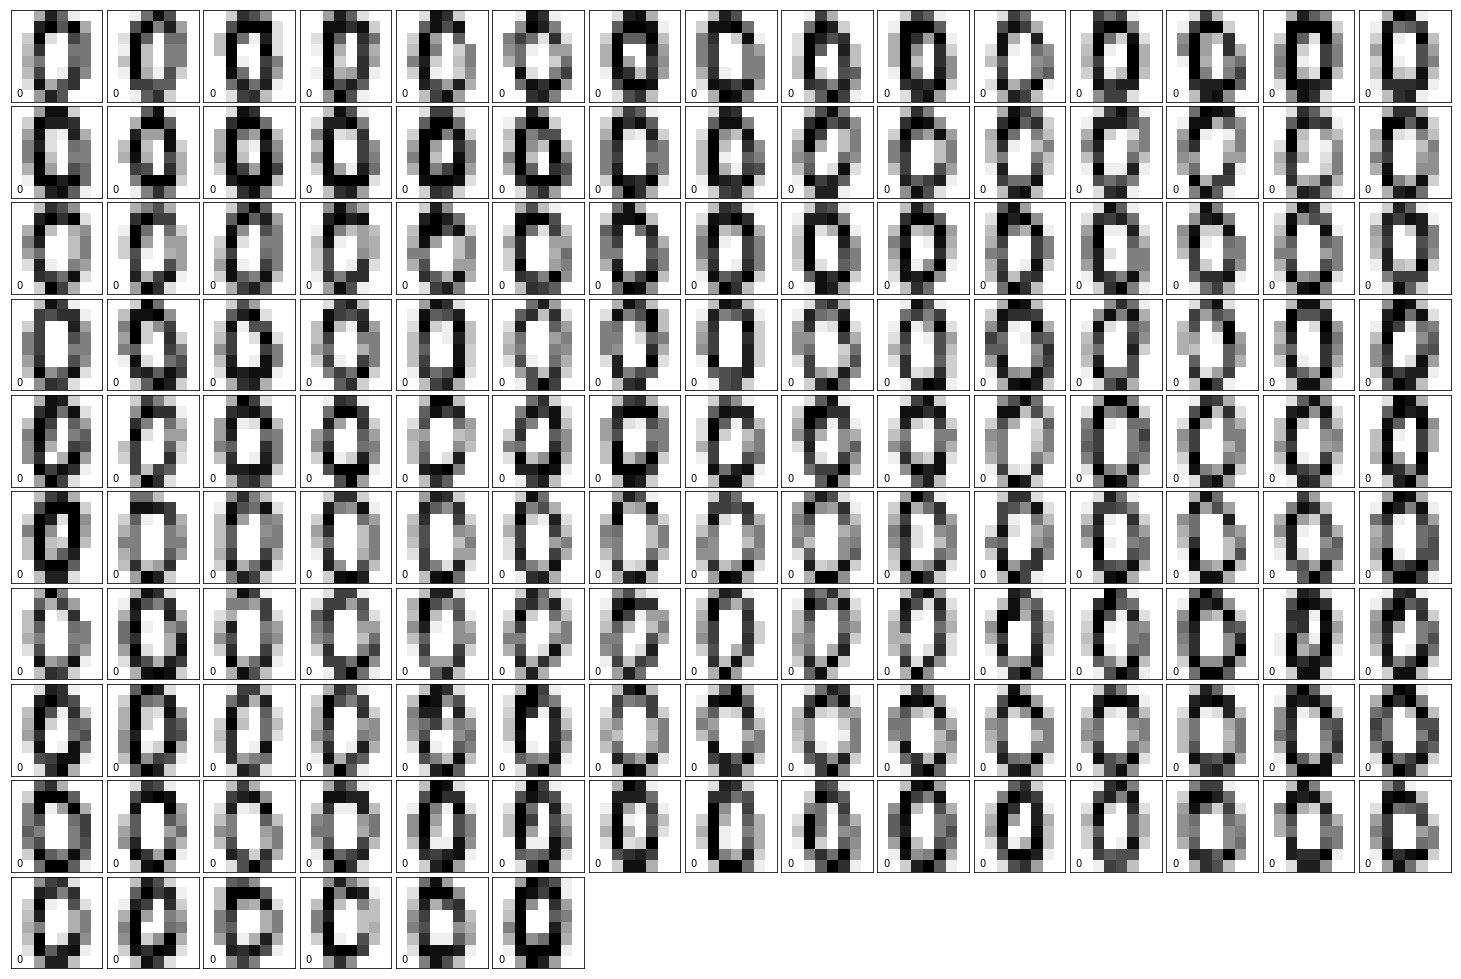

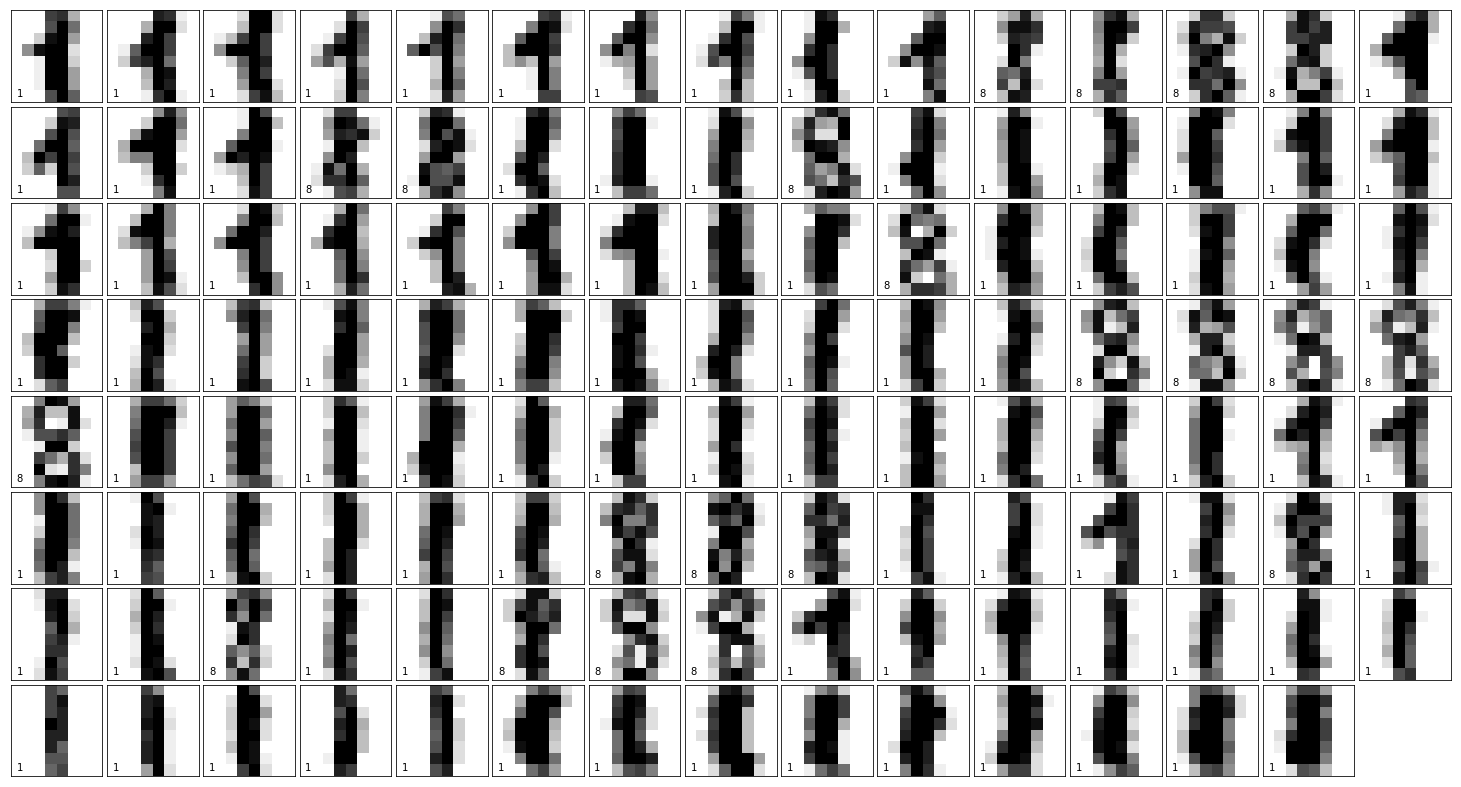

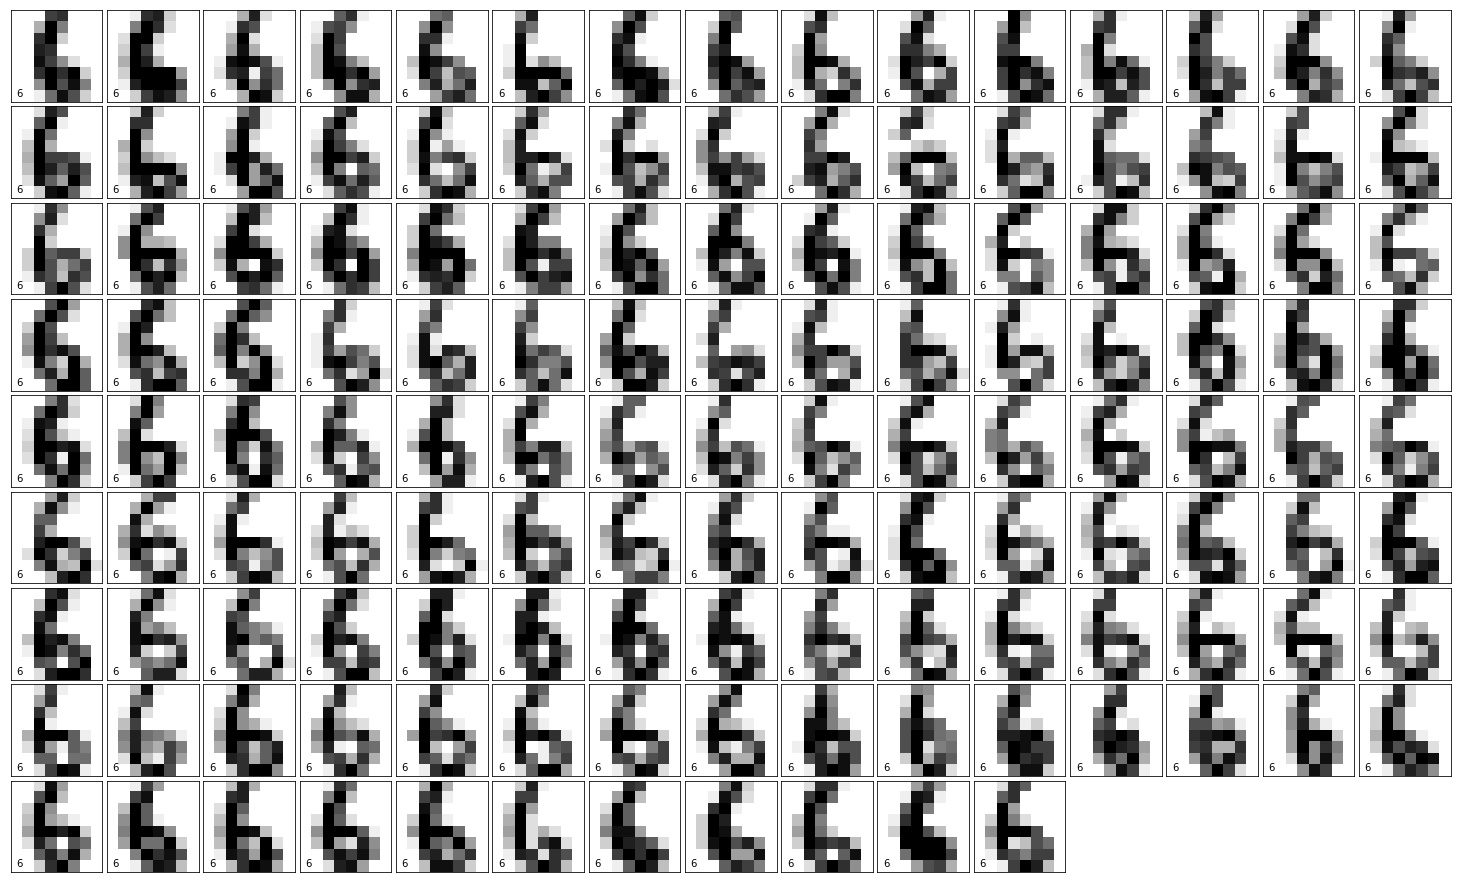

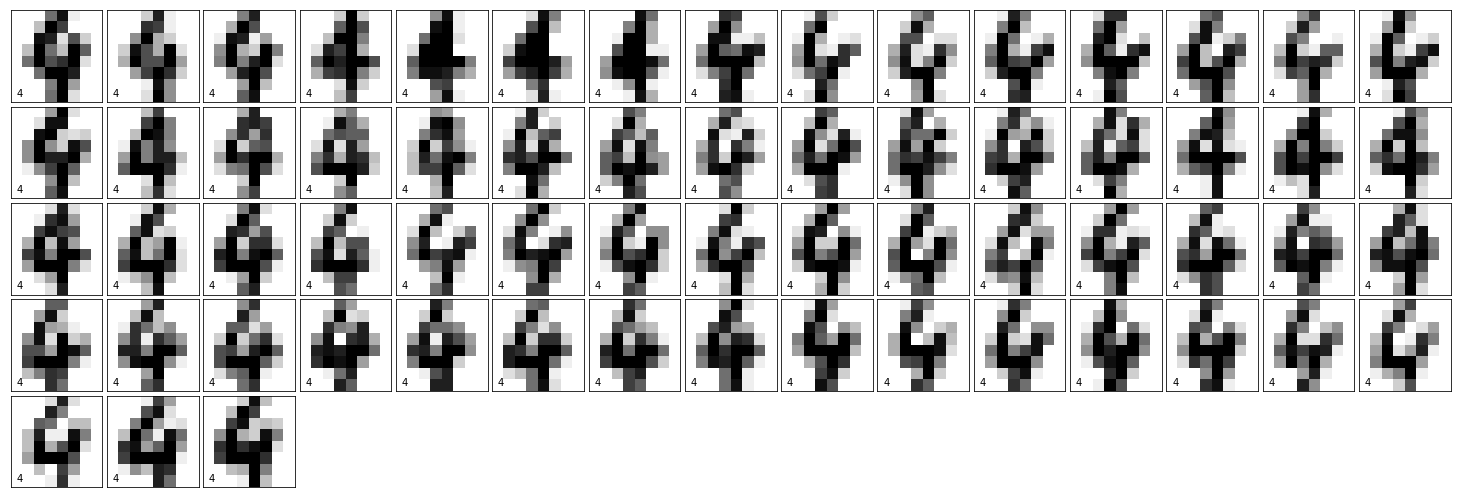

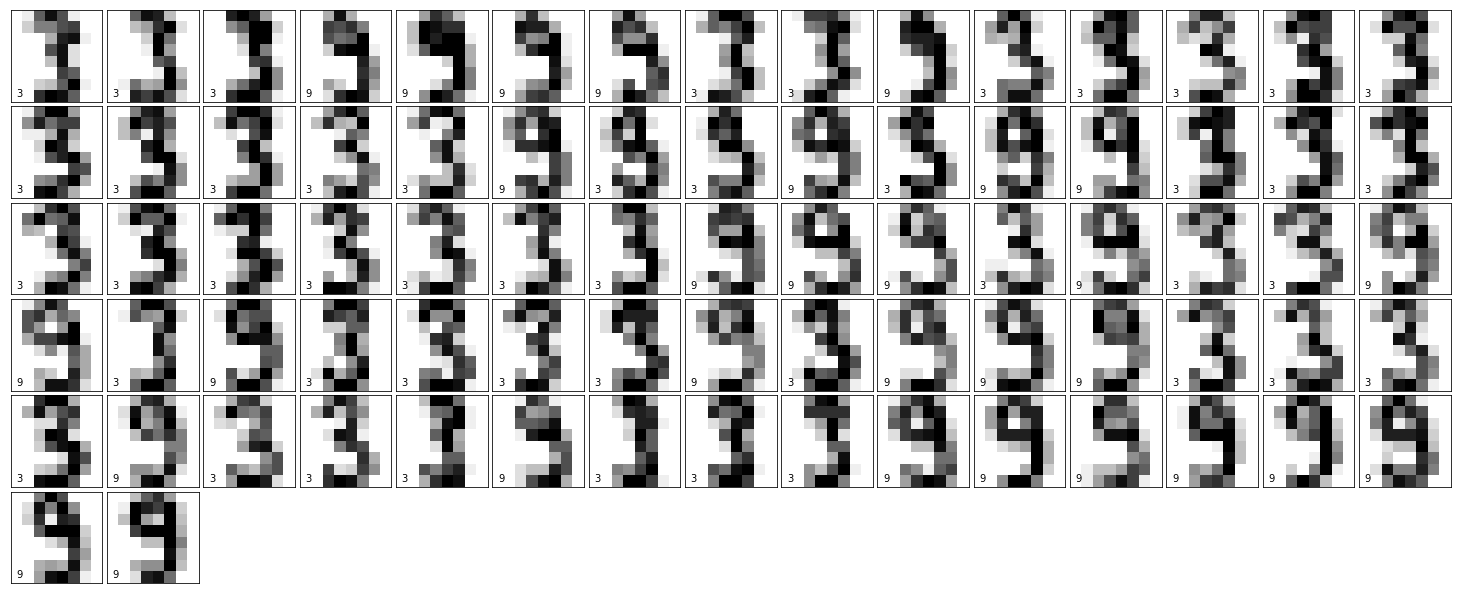

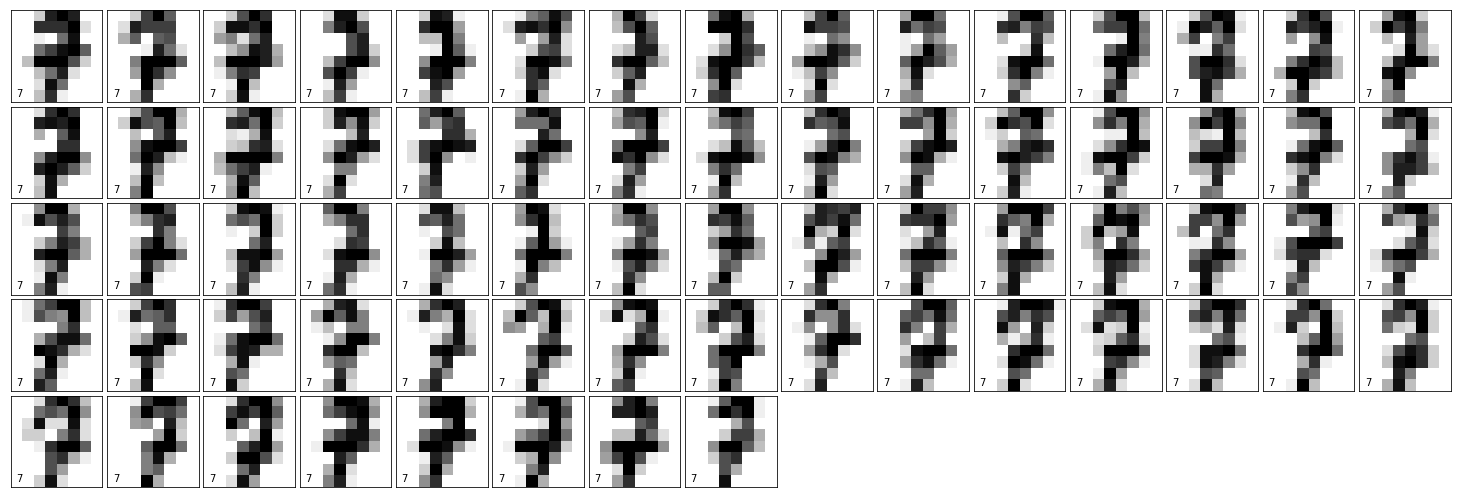

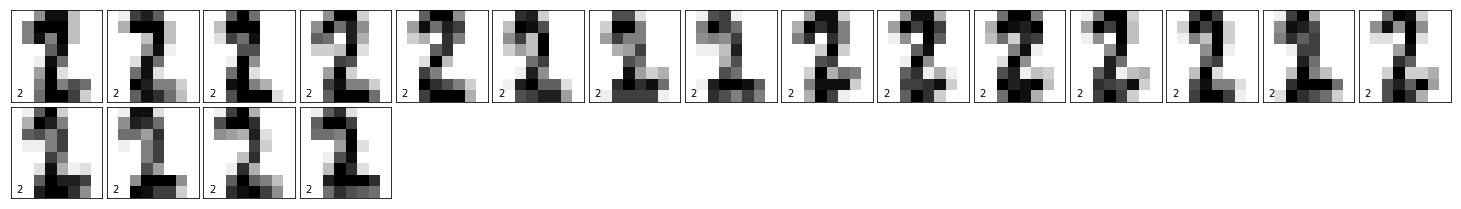

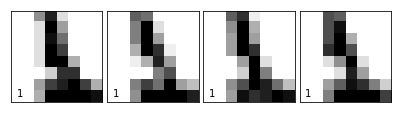

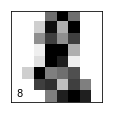

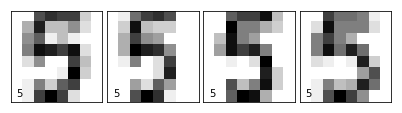

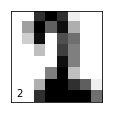

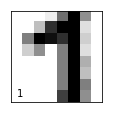

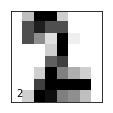

In [16]:
for i in range(n_clusters_):
    ShowCluster(i, core_samples_mask)

Вывод выбросов

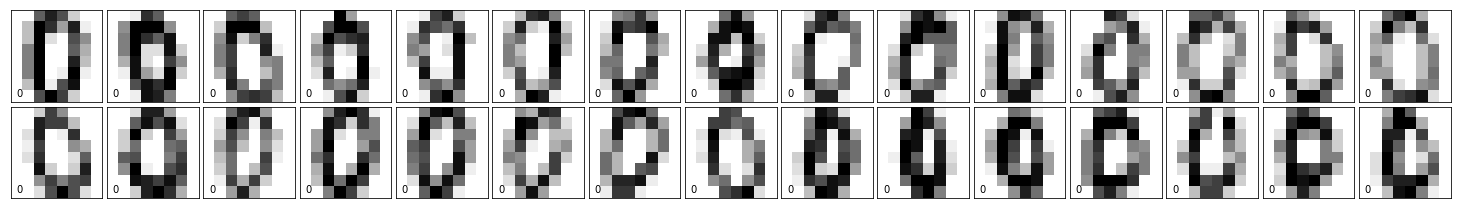

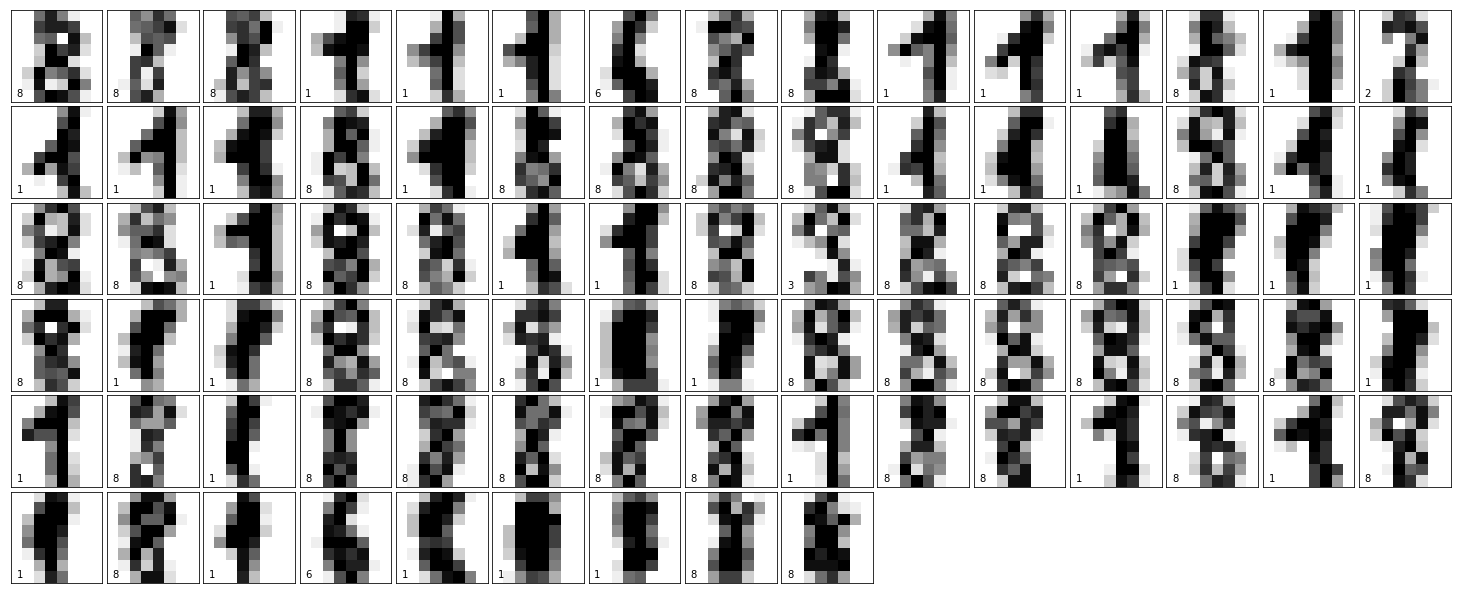

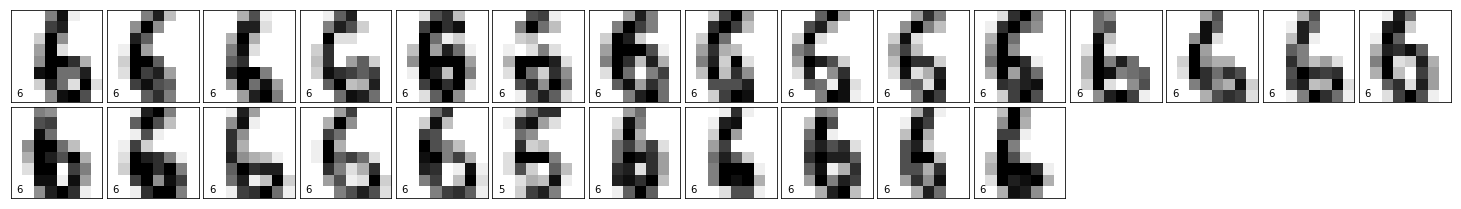

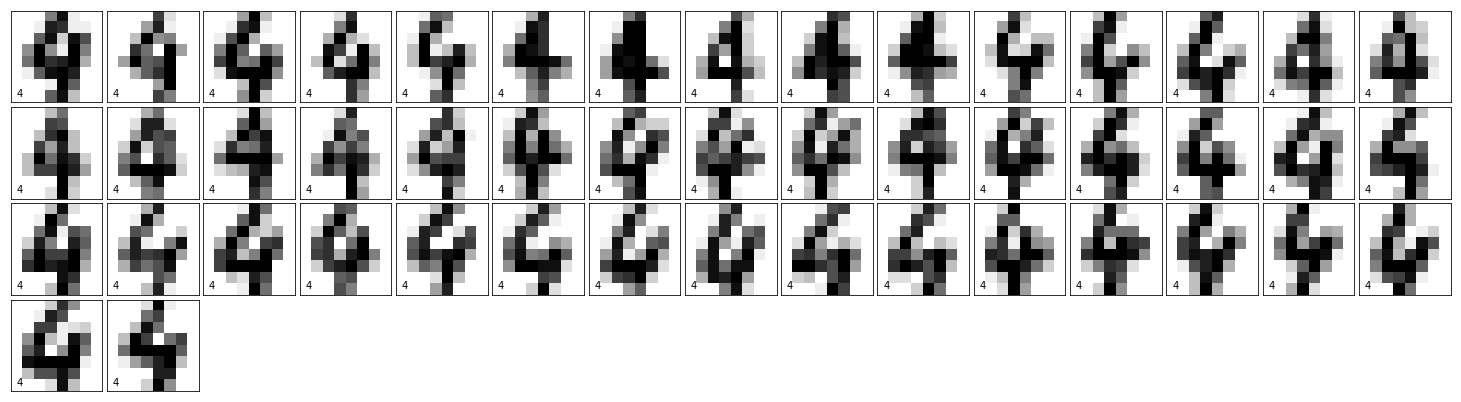

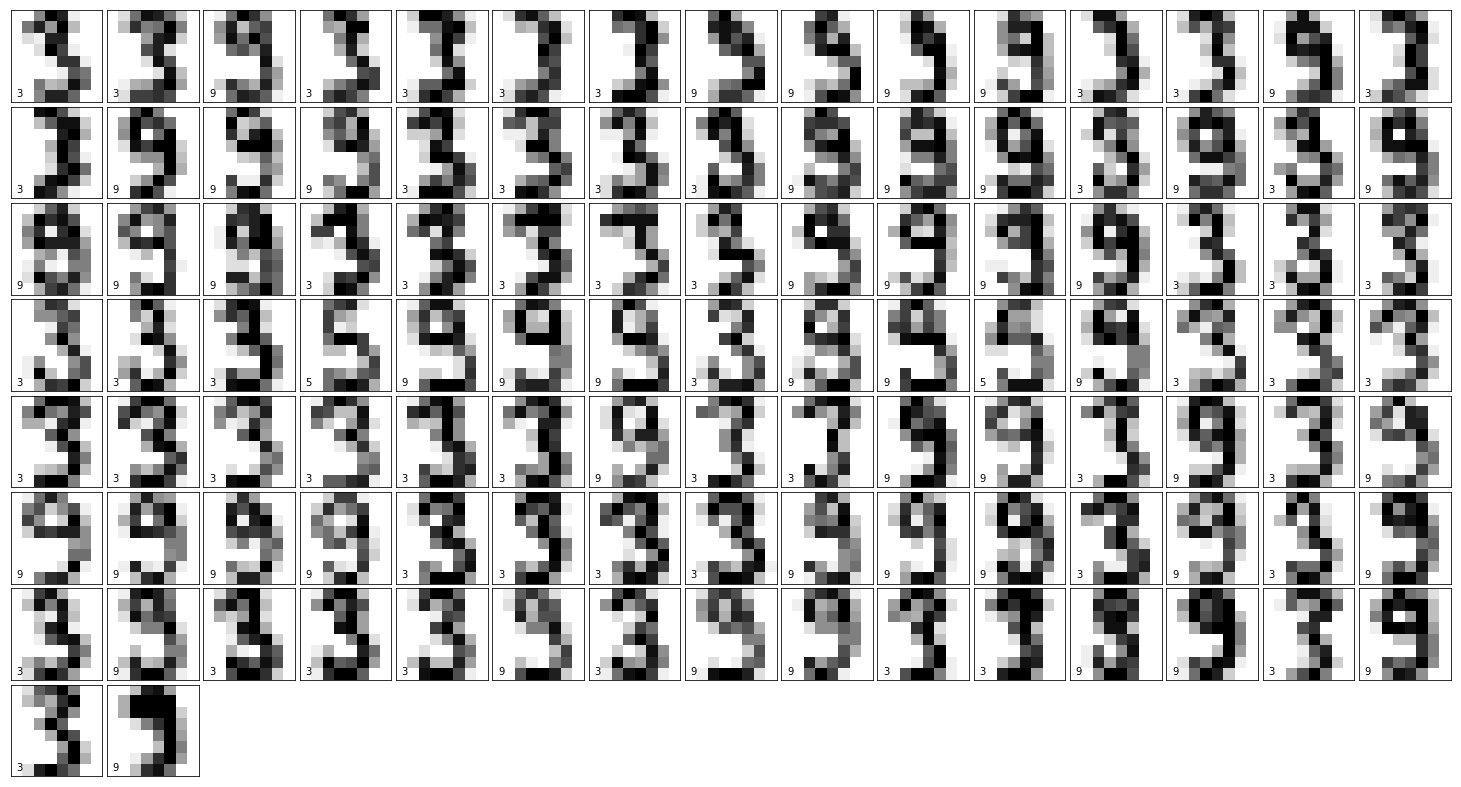

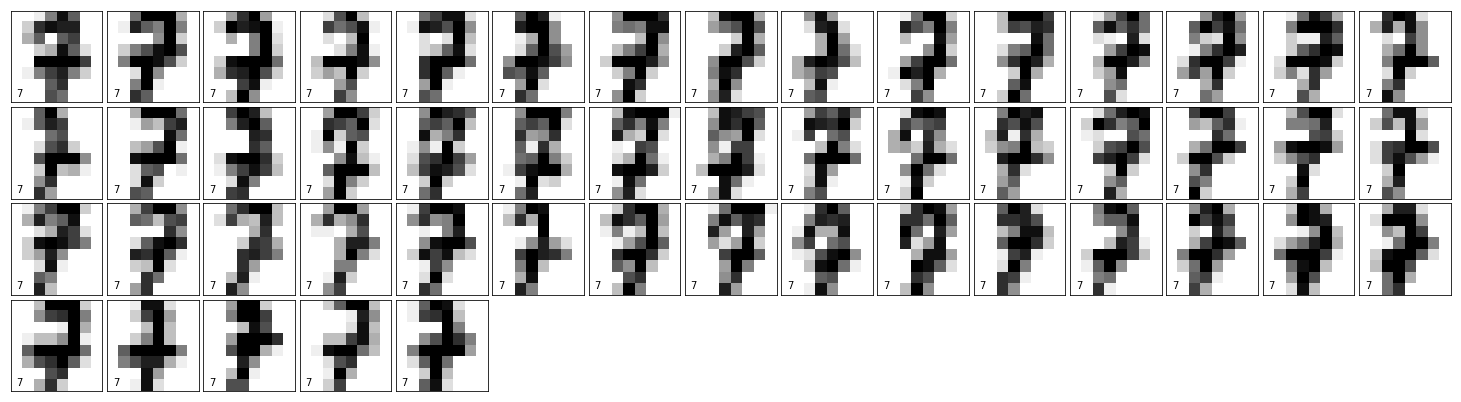

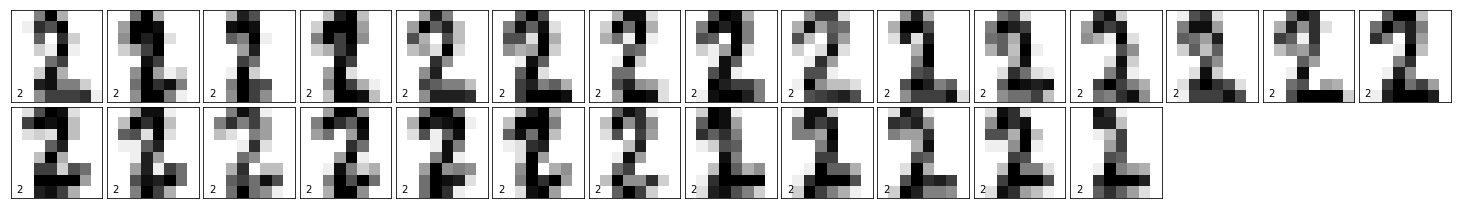

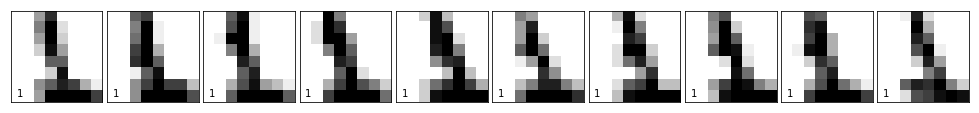

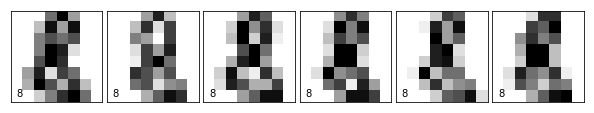

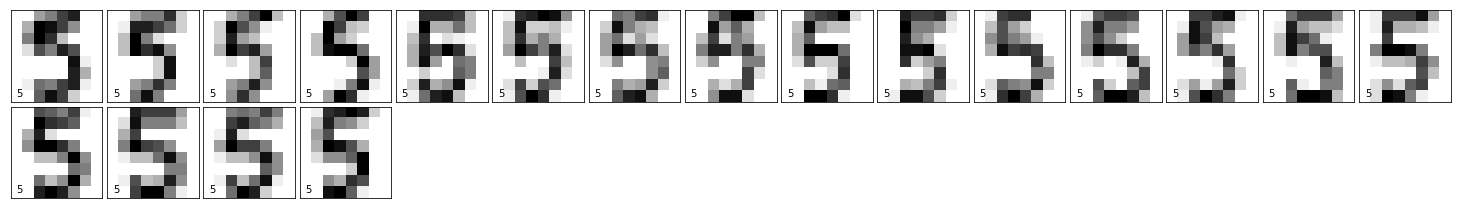

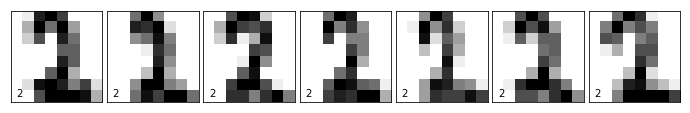

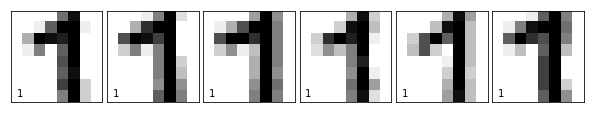

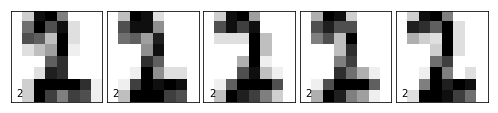

In [18]:
for i in range(n_clusters_):
    ShowCluster(i, [not x for x in core_samples_mask])

Выше есть огромный прогон по параметрам. Выбрав из них наилучший мы видим следющую ситуацию: многие циифры выделяются в отдельный кластер, но есть похожие, и есть те, которые по какому-то принципу делятся на два уникальных кластера. Алгоритм применять можно, но возможно, стоит уделить сильно больше времени подбору параметров.

Попробуем без шкалирования.

In [24]:
db = DBSCAN(eps=23.9, min_samples=10, n_jobs=4, metric='euclidean').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Adjusted Rand-Index", adjusted_rand_score(y, labels))
print("Adjusted Mutual Information", adjusted_mutual_info_score(y, labels))
print(n_clusters_)

Adjusted Rand-Index 0.404404726286
Adjusted Mutual Information 0.61817925637
10


# Уменьшение палитры изображения

In [2]:
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, estimate_bandwidth
from skimage.measure import compare_ssim
from skimage.io import imread

In [3]:
image = Image.open("two-lorikeet-birds-2293918.jpg")

In [4]:
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту.
pix = image.load()
print("Width", width)
print("Height", height)

Width 400
Height 275


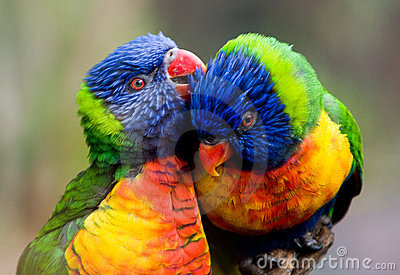

In [5]:
image

In [6]:
colors = np.array([list(pix[i, j]) for i in range(width) for j in range(height)])

Чтобы сопоставить $pix[i, j]$ и $colors[k]$, предъявим формулу $k = i \cdot height + j$. Таким образом мы можем сопоставлять картинку и одномерный массив в обе стороны

In [8]:
print(pix[5, 8])
print(colors[5 * height + 8])

(134, 144, 110)
[134 144 110]


In [9]:
print(colors[146])
print(pix[146 // height, 146 % height])

[141 146 116]
(141, 146, 116)


Получим матрицу признаков.

In [7]:
red = [col[0] for col in colors]
green = [col[1] for col in colors]
blue = [col[2] for col in colors]
data = pd.DataFrame.from_records([red, green, blue]).T
data.columns = ['red', 'green', 'blue']

In [8]:
data.head()

,red,green,blue
0,140,150,116
1,138,148,114
2,136,146,112
3,139,149,115
4,142,152,118


Функция для кластеризации цветов с использованием KMeans

In [83]:
def RedrawImage_KMeans(n_colors=5):
    image = Image.open("two-lorikeet-birds-2293918.jpg")
    draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
    width = image.size[0] #Определяем ширину. 
    height = image.size[1] #Определяем высоту.
    pix = image.load()
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    for k in range(len(colors)):
        i = k // height
        j = k % height
        r = int(centers[labels[k]][0])
        g = int(centers[labels[k]][1])
        b = int(centers[labels[k]][2])
        draw.point((i, j), (r, g, b))
    image.save("ans_" + str(n_colors) + ".jpg", "JPEG")
    ans = Image.open("ans_" + str(n_colors) + ".jpg")
    Y = ans.load()
    colors_x = np.array([list(pix[i, j]) for i in range(width) for j in range(height)])
    colors_y = np.array([list(Y[i, j]) for i in range(width) for j in range(height)])
    
    #Сравним картинки
    img = imread('/home/penguinka/Documents/ML/ML_MIPT/two-lorikeet-birds-2293918.jpg')
    img2 = imread('/home/penguinka/Documents/ML/ML_MIPT/' + "ans_" + str(n_colors) + ".jpg")
    print(compare_ssim(img, img2, multichannel=True))
    
    return ans

0.522884969296


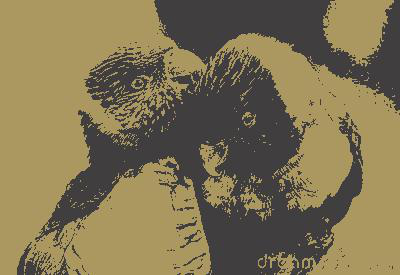

In [79]:
RedrawImage_KMeans(2)

0.548882159891


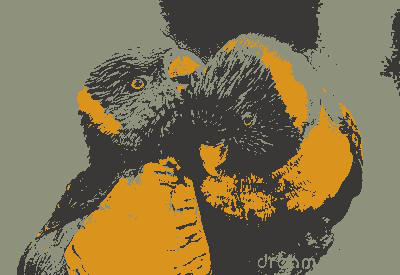

In [80]:
RedrawImage_KMeans(3)

0.654301752399


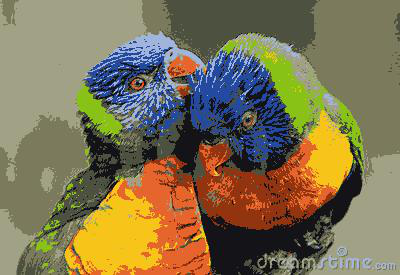

In [81]:
RedrawImage_KMeans(10)

0.727435726736


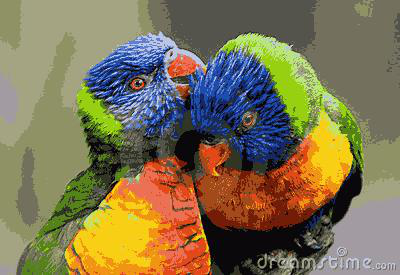

In [82]:
RedrawImage_KMeans(20)

Видим, что **KMeans** даёт довольно хорошие результаты. Помимо того, он довольно быстро работает, что позволяет использовать его 

In [90]:
def RedrawImage_MeanShift():
    image = Image.open("two-lorikeet-birds-2293918.jpg")
    draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
    width = image.size[0] #Определяем ширину. 
    height = image.size[1] #Определяем высоту.
    pix = image.load()
    ms = MeanShift(bandwidth=20).fit(data)
    labels = ms.labels_
    centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print(n_clusters_, "clusters")
    for k in range(len(colors)):
        i = k // height
        j = k % height
        r = int(centers[labels[k]][0])
        g = int(centers[labels[k]][1])
        b = int(centers[labels[k]][2])
        draw.point((i, j), (r, g, b))
    image.save("ans_" + str(n_clusters_) + ".jpg", "JPEG")
    ans = Image.open("ans_" + str(n_clusters_) + ".jpg")
    
    
    img = imread('/home/penguinka/Documents/ML/ML_MIPT/two-lorikeet-birds-2293918.jpg')
    img2 = imread('/home/penguinka/Documents/ML/ML_MIPT/' + "ans_" + str(n_clusters_) + ".jpg")
    print(compare_ssim(img, img2, multichannel=True))
    
    return ans

1651 clusters
0.839243170658
CPU times: user 25min 35s, sys: 850 ms, total: 25min 36s
Wall time: 25min 36s


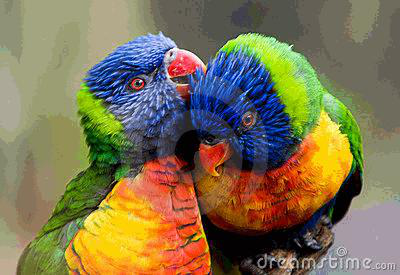

In [91]:
%%time
RedrawImage_MeanShift()

1651 clusters
0.839243170658
CPU times: user 24min 1s, sys: 443 ms, total: 24min 1s
Wall time: 24min 2s


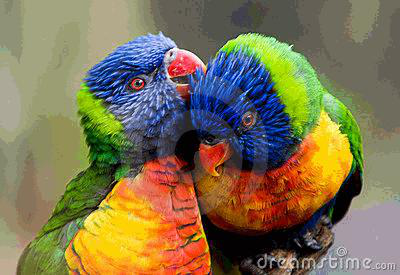

In [101]:
%%time
RedrawImage_MeanShift()

После получасовой работы алгоритма, мы получили 1651 цвет. А с учётом того, что параметр, задающий количество кластеров, отсутствует, очень сложно подобрать параметр, чтобы получилось искомое количество кластеров. Поэтому этот алогритм не самый лучший. Изначально было около 65 тысяч цветов, так что можно считать, что эта кластеризация тоже удалась на славу:)

In [13]:
from sklearn.neighbors import kneighbors_graph
image = Image.open("two-lorikeet-birds-2293918.jpg")
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту.
pix = image.load()
сolors = np.array([list(pix[i, j]) for i in range(width) for j in range(height)])
graph = kneighbors_graph(colors, 50, mode='connectivity', include_self=True)

def RedrawImage_AgCl_graph(n_colors=5, graph=graph, data=data):
    ag = AgglomerativeClustering(n_clusters=n_colors, connectivity=graph).fit(data)
    labels = ag.labels_
    r = np.zeros(n_colors)
    g = np.zeros(n_colors)
    b = np.zeros(n_colors)
    cluster_size = np.zeros(n_colors)
    for i in range(len(colors)):
        cluster_size[labels[i]] += 1
        r[labels[i]] += colors[i][0]
        g[labels[i]] += colors[i][1]
        b[labels[i]] += colors[i][2]

    r /= cluster_size
    g /= cluster_size
    b /= cluster_size
    
    for k in range(len(colors)):
        i = k // height
        j = k % height
        draw.point((i, j), (int(r[labels[k]]),int(g[labels[k]]),int(b[labels[k]])))
    image.save("ans_" + str(n_colors) + ".jpg", "JPEG")
    ans = Image.open("ans_" + str(n_colors) + ".jpg")
    img = imread('/home/penguinka/Documents/ML/ML_MIPT/two-lorikeet-birds-2293918.jpg')
    img2 = imread('/home/penguinka/Documents/ML/ML_MIPT/' + "ans_" + str(n_colors) + ".jpg")
    print(compare_ssim(img, img2, multichannel=True))

    return ans

Так как запустить алгоритм на всех данных не получилось из-за MemoryError, воспользуемся kneighbors_graph и получим следующие результаты. Сравним результаты ssim (они написаны над картинкой) и увидим, что результаты KMeans лучше, чем результаты AgglomerativeClustering примерно на 0.02

/usr/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


[ 168.21140264   61.44232253]
0.52622281188


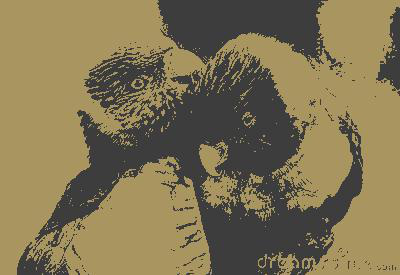

In [10]:
RedrawImage_AgCl_graph(2)

/usr/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


0.537361912208


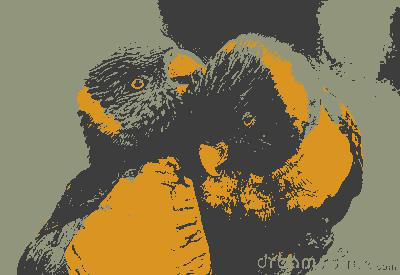

In [14]:
RedrawImage_AgCl_graph(3)

/usr/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


0.624138936029


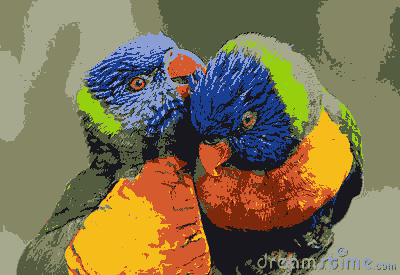

In [15]:
RedrawImage_AgCl_graph(10)

/usr/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


0.706820126048


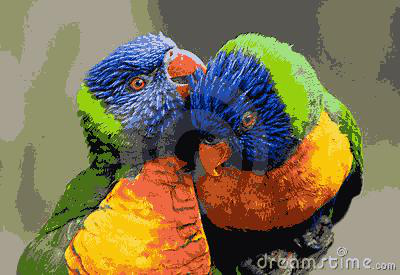

In [16]:
RedrawImage_AgCl_graph(20)

Наиболее удачным, таким образом, оказался **KMeans**